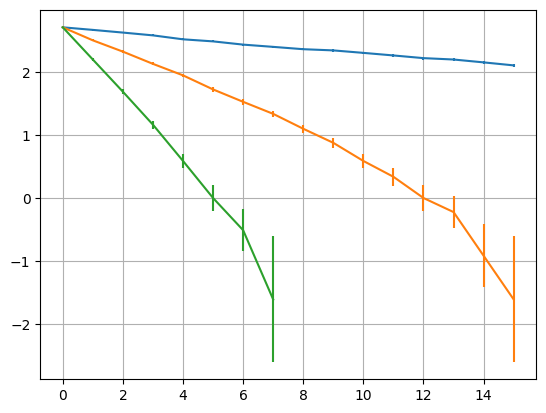

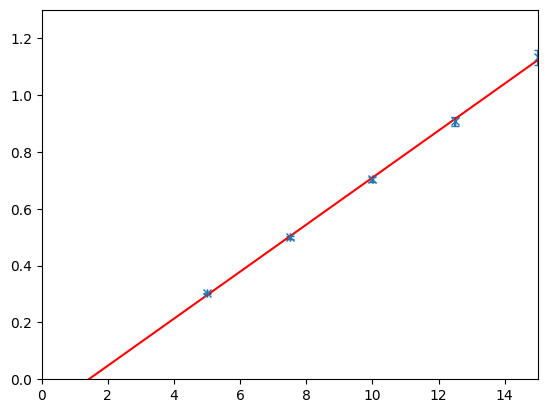

U= [2.]    v= 0.16533087582799663    dv= 0.053667048389585664 phi= 0.4    dpi= 0.14142135623730953
U= [3.]    v= 0.24799631374199493    dv= 0.05370945232443827 phi= 0.5    dpi= 0.14142135623730953
U= [4.]    v= 0.33066175165599326    dv= 0.0537687616519897 phi= 0.5    dpi= 0.14142135623730953
U= [5.]    v= 0.4133271895699916    dv= 0.0538449205092016 phi= 0.7    dpi= 0.14142135623730953
U= [6.]    v= 0.49599262748398987    dv= 0.05393785752282336 phi= 0.8    dpi= 0.14142135623730953
U= [6.5]    v= 0.5373253464409891    dv= 0.05399059137320702 phi= 1.1    dpi= 0.14142135623730953
U= [6.7]    v= 0.5538584340237888    dv= 0.0540128506849162 phi= 1.3    dpi= 0.14142135623730953
U= [7.]    v= 0.5786580653979883    dv= 0.05404748614060544 phi= 1.7    dpi= 0.14142135623730953
U= [7.2]    v= 0.5951911529807878    dv= 0.054071406194466716 phi= 1.9    dpi= 0.14142135623730953
U= [7.4]    v= 0.6117242405635875    dv= 0.05409598902463421 phi= 2.1    dpi= 0.14142135623730953
U= [7.6]    v= 0.628257

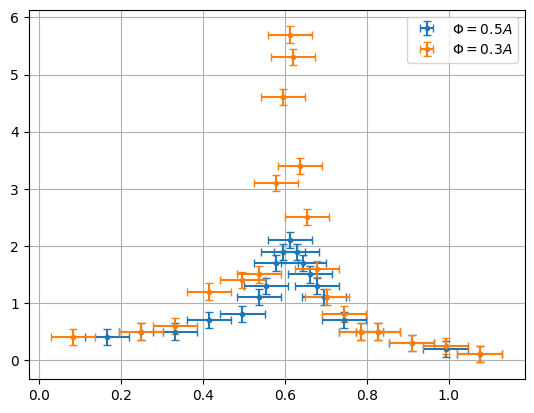

phi_03_max= 4.030508652763321
phi_05_max= 1.4849242404917498


In [109]:
import numpy as np
import sympy as sym
import matplotlib.pylab as plt

phi_01 = [15, 14.4, 13.8, 13.2, 12.4, 12, 11.4, 11, 10.6, 10.4, 10, 9.6, 9.2, 9, 8.6, 8.2]
phi_03 = [15, 12.2, 10.2, 8.4, 7, 5.6, 4.6, 3.8, 3, 2.4, 1.8, 1.4, 1, 0.8, 0.4, 0.2]
phi_05 = [15, 9, 5.4, 3.2, 1.8, 1, 0.6, 0.2,0,0,0,0,0,0,0,0]

amp_03 = np.array([[2, 0.4], [3, 0.5], [4, 0.5], [5, 0.7], [6, 0.8], [6.5, 1.1], [6.7, 1.3], [7, 1.7], [7.2, 1.9], [7.4, 2.1], [7.6, 1.9], [7.8, 1.7], [8.0, 1.5], [8.2, 1.3], [8.4, 1.1], [9, 0.7], [9.5, 0.5], [10, 0.5], [11, 0.3], [12, 0.2], [13, 0.1]])
amp_05 = np.array([[1, 0.4], [3, 0.5], [4, 0.6], [5, 1.2], [6, 1.4], [6.5, 1.5], [7, 3.1], [7.2, 4.6], [7.4, 5.7], [7.5, 5.3], [7.7, 3.4], [7.9, 2.5], [8.2, 1.6], [8.5, 1.1], [9, 0.8], [9.5, 0.5,], [10, 0.5], [11, 0.3], [12, 0.25], [13, 0.1]])
ln_phi_01 = np.log(phi_01)
ln_phi_03 = np.log(phi_03)

ln_phi_05 = np.log(phi_05[:8])

T_err = 0.2

Engine = np.array([[5, 33], [7.5, 20.01], [10, 14.22], [12.5, 11.02], [15, 8.83]])

mu_err = np.reshape((10*T_err) / (Engine[:,1]**2), 5)
Engine[:,1] = 1 / (Engine[:,1] / 10)

x_bar_eng = Engine[:,[0]].mean()
y_bar_eng = Engine[:,[1]].mean()
xsquare_bar_eng = (Engine[:,[0]]**2).mean()
xy_eng = (Engine[:,[0]] * Engine[:,[1]]).mean()

m_eng, n_eng = np.polyfit(Engine[:,0], Engine[:,1],1)


dphi = 0.2
d_ln_phi_01 = np.empty(len(phi_01))
d_ln_phi_03 = np.empty(len(phi_03))
d_ln_phi_05 = np.empty(len(phi_05[:8]))

for i in range((len(phi_01))):
    d_ln_phi_01[i] = dphi * (1/phi_01[i])
    d_ln_phi_03[i] = dphi * (1/phi_03[i])
    if(i < len(d_ln_phi_05)):
        d_ln_phi_05[i] = dphi * (1/phi_05[i])

n = np.linspace(0,15, 16)

xy1_bar = np.empty(len(ln_phi_01))
xy2_bar = np.empty(len(ln_phi_03))
xy3_bar = np.empty(len(ln_phi_05))

x_bar_2 = np.sum(n[:8]) / len(n[:8])
x_bar2_square = np.sum((n[:8])**2) / len(n[:8])


x_bar = np.sum(n) / len(n)
y1_bar = np.sum(ln_phi_01) / len(ln_phi_01)
y2_bar = np.sum(ln_phi_03) / len(ln_phi_03)
y3_bar = np.sum(ln_phi_05) / len(ln_phi_05)

xsquare_bar = np.sum(n**2) / len(n)

xsquare_err1 = np.sum(1/(d_ln_phi_01**2))
xsquare_err2 = np.sum(1/(d_ln_phi_03**2))
xsquare_err3 = np.sum(1/(d_ln_phi_05**2))

sigma1 = len(n) / xsquare_err1
sigma2 = len(n) / xsquare_err2
sigma3 = len(n) / xsquare_err3

d_m1 = np.sqrt(sigma1 / (len(n)*(xsquare_bar - (x_bar**2))))
d_m2 = np.sqrt(sigma2 / (len(n)*(xsquare_bar - (x_bar**2))))
d_m3 = np.sqrt(sigma3 / (len(n)*(x_bar2_square - (x_bar_2**2))))

d_n1 = xsquare_bar * d_m1
d_n2 = xsquare_bar * d_m2
d_n3 = x_bar2_square * d_m3

n_l = np.linspace(0,15,1000)

#print("m1, n1",m1, n1, "    m2, n2", m2, n2, "     m3, n3", m3, n3)
#print("d_m1, d_n1",d_m1, d_n1, "    d_m2, d_n2", d_m2, d_n2, "     d_m3, d_n3", d_m3, d_n3)
#print("x_bar=", x_bar)
#print("y1_bar=", y1_bar, "  y2_bar=", y2_bar, "   y3_bar=", y3_bar)
#print("xy1_bar=", xy1_bar, "   xy2_bar=", xy2_bar, "   xy3_bar=", xy3_bar)
#print("x^2 =", xsquare_bar)
#print("xsquare_err1=", sigma1, "   xsquare_err2=", sigma2, "   xsquare_err3=", sigma3)
#print("x_bar2=", x_bar_2, "      x_bar_square2=", x_bar2_square)

plt.errorbar(n, ln_phi_01, d_ln_phi_01)
plt.plot()
plt.errorbar(n, ln_phi_03, d_ln_phi_03)
plt.errorbar(n[:8], ln_phi_05, d_ln_phi_05)
plt.grid()
plt.show()

U_03 = amp_03[:, [0]]
U_05 = amp_05[:, [0]]

amp_03[:, [0]] =  amp_03[:, [0]] * m_eng
amp_05[:, [0]] =  amp_05[:, [0]] * m_eng

x = np.linspace(0, 16, 500)

U_err = np.reshape(Engine[:,[1]] * 0.01, 5)

#print("Muerr", mu_err)

plt.errorbar(Engine[:,0], Engine[:,1], xerr=U_err, yerr=mu_err, fmt="x", capsize=3)
plt.xlim([0, 15])
plt.ylim([0, 1.3])
plt.plot(x, (m_eng*x +n_eng), color="red")

err_eng = len(mu_err) / np.sum(1/(mu_err**2))

d_m_eng = np.sqrt(err_eng / (len(mu_err) * (xsquare_bar_eng - (x_bar_eng**2))))
d_n_eng = d_m_eng * xsquare_bar_eng

#print(Engine)
#print("m_eng, n_eng = ", m_eng, n_eng)
#print("xsquare_eng=", xsquare_bar_eng)
#print("xy_eng=", xy_eng)
#print("x_bar_eng=", x_bar_eng)
#print("y_bar_eng=", y_bar_eng)
#print("Sigmaquad_eng=", err_eng)
#print("m_err_eng, n_err_eng", d_m_eng, d_n_eng)
plt.show()

#print((d_m_eng*Engine[:,[0]])**2)
#print((U_err * m_eng)**2)
#print((d_n_eng)**2)

yerr_amp = np.sqrt(2*(((dphi/2)**2)))

v_03 = amp_03[:,[0]].reshape(21)
phi2_03 = amp_03[:,[1]].reshape(21)

v_05 = amp_05[:,[0]].reshape(20)
phi2_05 = amp_05[:,[1]].reshape(20)


xerr_amp03 = np.sqrt((d_m_eng*U_03)**2 + ((U_03*0.01)*m_eng)**2 + (d_n_eng)**2).reshape(21)
xerr_amp05 = np.sqrt((d_m_eng*U_05)**2 + ((U_05*0.01)*m_eng)**2 + (d_n_eng)**2).reshape(20)
for i in range(len(U_03)-1):
    print("U=",U_03[i], "   v=",v_03[i], "   dv=", xerr_amp03[i], "phi=", phi2_03[i], "   dpi=", yerr_amp)

for i in range(len(U_05)-1):
    print("v=", v_05[i], "   dv=", xerr_amp05[i], "   phi=", phi2_05[i], "   dpi=", yerr_amp)

#print(yerr_amp)
plt.errorbar(v_03, phi2_03, yerr=yerr_amp, xerr=xerr_amp03, fmt=".", capsize=3, label=r'$\Phi=0.5 A$')
plt.errorbar(v_05, phi2_05, yerr=yerr_amp, xerr=xerr_amp05, fmt=".", capsize=3, label=r'$\Phi=0.3 A$')
plt.grid()
plt.legend(loc='upper right')
plt.show()

phi03_max = np.max(phi2_03)
phi05_max = np.max(phi2_05)

print("phi_03_max=", phi05_max * 1/np.sqrt(2))
print("phi_05_max=", phi03_max * 1/np.sqrt(2))


